In [70]:
# import the requried libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
# install the library to connect to MySQL Database
!pip install mysql-connector-python
import mysql.connector



In [143]:
# connect local database
db = mysql.connector.connect(
   host="localhost",
   user="root",
   password="hieudz123",
   database="stress"
)

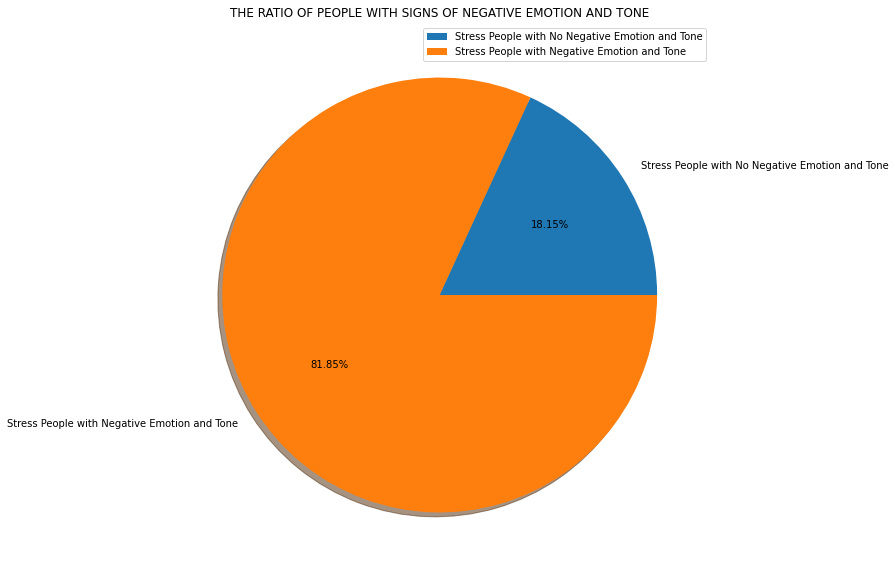

In [147]:
# Query the database to retrieve the ratio of people with signs of negative emotion and tone
mycursor = db.cursor(buffered=True)
stressPeople = []
stressPeople2 = []

sql = 'SELECT COUNT(post_id) FROM stressdata WHERE label = 1'
mycursor.execute(sql)
totalNumStress = mycursor.fetchall()[0][0]

sql = 'SELECT COUNT(post_id) FROM stressdata WHERE label = 1 AND lex_liwc_negemo > 1 AND lex_liwc_Tone < 50'
mycursor.execute(sql)
rows = mycursor.fetchall()[0][0]
y = np.array([totalNumStress - rows, rows])
mylabels = ["Stress People with No Negative Emotion and Tone", "Stress People with Negative Emotion and Tone"]
plt.figure(figsize=(20,10))
plt.pie(y, labels = mylabels, shadow = True, autopct = "%0.2f%%")
plt.title("THE RATIO OF PEOPLE WITH SIGNS OF NEGATIVE EMOTION AND TONE")
plt.legend()
plt.show() 


[0.5142543859649122, 0.5645161290322581, 0.5127272727272727, 0.507537688442211, 0.5, 0.5688888888888889, 0.52, 0.518796992481203, 0.5507246376811594, 0.5261538461538462, 0.4827586206896552, 0.5575221238938053]


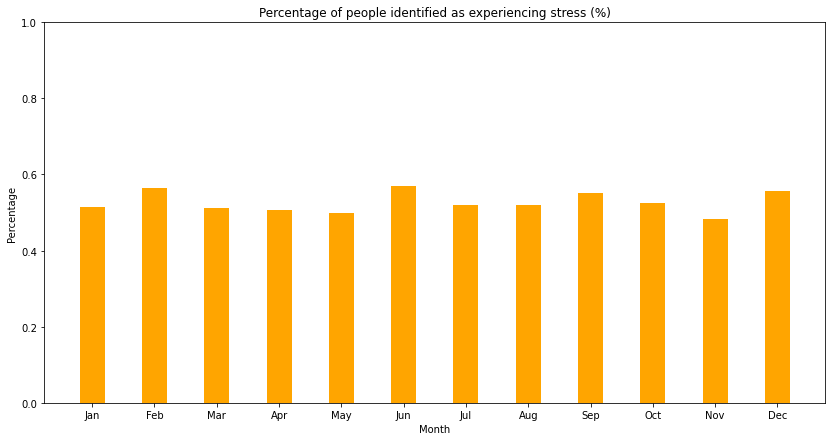

In [148]:
# Query the database to retrieve the percentage of people indentified as experiencing stress
for num in range(1, 13):
    sql = 'SELECT COUNT(post_id) FROM stressdata WHERE month(date_post)=' + str(num) + ' AND label = 1'
    mycursor.execute(sql)
    rows = mycursor.fetchall()
    stressPeople.append(rows[0][0])
    
for num in range(1, 13):
    sql2 = 'SELECT COUNT(post_id) FROM stressdata WHERE month(date_post)=' + str(num)
    mycursor.execute(sql2)
    rows = mycursor.fetchall()
    stressPeople2.append(rows[0][0])

res = []
for num in range(0, 12):
    res.append(stressPeople[num] / stressPeople2[num])

print(res)
mycursor.close()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig = plt.figure(figsize = (14, 7))
 
# creating the bar plot
plt.bar(months, res, color ='orange',
        width = 0.4)
 
plt.xlabel("Month")
plt.ylabel("Percentage")
plt.title("Percentage of people identified as experiencing stress (%)")
plt.ylim(0, 1.0)
plt.show()

[0.6423841059602649, 0.6915887850467289, 0.6722222222222223, 0.6744186046511628, 0.6797385620915033, 0.7074829931972789, 0.69375, 0.7073170731707317, 0.7005988023952096, 0.7053140096618358, 0.621301775147929, 0.7230769230769231]
[0.7421383647798742, 0.8032786885245902, 0.7714285714285715, 0.7058823529411765, 0.8192771084337349, 0.7792207792207793, 0.8144329896907216, 0.8260869565217391, 0.8529411764705882, 0.7767857142857143, 0.7558139534883721, 0.7837837837837838]


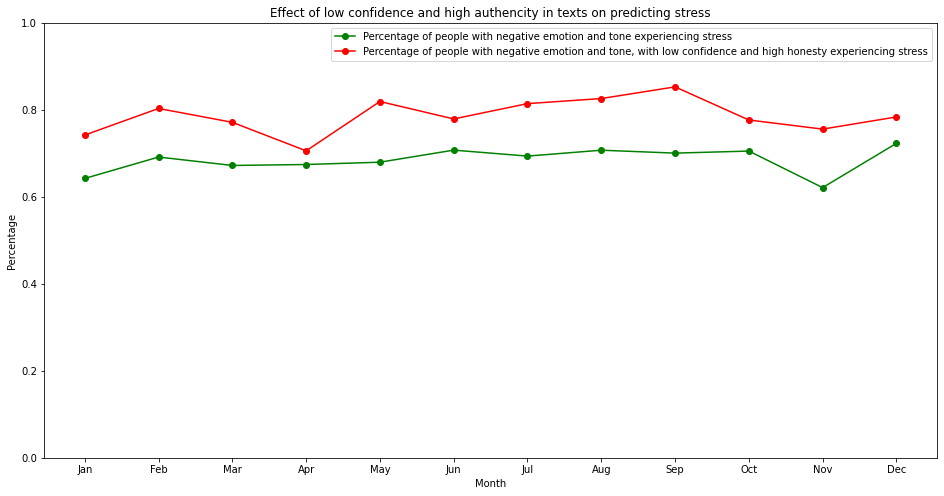

In [165]:
#demonstrate that authencity and clout plays an important role in predicting stress or not 
#by showing that people with negative emotion and tone and low level of confidence and high honesty 
#have a more chance of being stressful than people with just negative tone and emotion.
mycursor = db.cursor(buffered=True)
temp1 = []
result1 = []
for num in range(1, 13):
    sql = 'SELECT COUNT(post_id) FROM stressdata WHERE month(date_post)=' + str(num) + ' AND lex_liwc_negemo > 1 AND lex_liwc_Tone < 50'
    mycursor.execute(sql)
    rows = mycursor.fetchall()
    temp1.append(rows[0][0])
temp2 = []
for num in range(1, 13):
    sql = 'SELECT COUNT(post_id) FROM stressdata WHERE month(date_post)=' + str(num) + ' AND label = 1 AND lex_liwc_negemo > 1 AND lex_liwc_Tone < 50'
    mycursor.execute(sql)
    rows = mycursor.fetchall()
    temp2.append(rows[0][0])
for num in range(0, 12):
    result1.append(temp2[num] / temp1[num])
print(result1)

temp3 = []
result2 = []
for num in range(1, 13):
    sql = 'SELECT COUNT(post_id) FROM stressdata WHERE month(date_post)=' + str(num) + ' AND lex_liwc_negemo > 1 AND lex_liwc_Tone < 50 AND lex_liwc_Clout < 40.43 AND lex_liwc_Authentic > 67.6'
    mycursor.execute(sql)
    rows = mycursor.fetchall()
    temp3.append(rows[0][0])
temp4 = []
for num in range(1, 13):
    sql = 'SELECT COUNT(post_id) FROM stressdata WHERE month(date_post)=' + str(num) + ' AND lex_liwc_negemo > 1 AND lex_liwc_Tone < 50 AND lex_liwc_Clout < 40.43 AND lex_liwc_Authentic > 67.6 AND label = 1'
    mycursor.execute(sql)
    rows = mycursor.fetchall()
    temp4.append(rows[0][0])
for num in range(0, 12):
    result2.append(temp4[num] / temp3[num])
print(result2)

plt.figure(figsize=(16,8))
# Plot a simple line chart
plt.plot(months, result1, 'g', label='Percentage of people with negative emotion and tone experiencing stress', marker='o')

# Plot another line on the same chart/graph
plt.plot(months, result2, 'r', label='Percentage of people with negative emotion and tone, with low confidence and high honesty experiencing stress', marker='o')
plt.xlabel("Month")
plt.ylabel("Percentage")
plt.ylim(0, 1.0)
plt.title('Effect of low confidence and high authencity in texts on predicting stress')
plt.legend()
plt.show()





